# DS271 Final Presentation

Title: Structural Break Detection - NYC **Half** Marathon Finish Time

By: Peter Liu

Date: 12/5/2025

## Introduction and Motivation

As a participant in the NYC Half Marathon over a decade ago, I experienced the original course that began in Central Park and finished in Lower Manhattan's financial district. This study investigates structural break detection in the NYC Half Marathon finish time distribution following a significant course modification in 2018. Prior to 2018, the race followed the relatively flat route described above. The revised course relocated the start to Brooklyn, requiring runners to traverse the Brooklyn Bridge—a substantial elevation challenge—before finishing in Central Park. This course change represents an external intervention that may produce a detectable structural break in finish times. Using publicly available data from the New York Road Runners and other sources, this analysis applies classical statistical methods to test whether the 2018 route modification created a statistically significant shift in the time series data-generating process.




## Theoretical Background

**Zivot-Andrews (ZA) test**

This analysis employs the Zivot-Andrews (ZA) test, introduced in Lab 2, to detect potential structural breaks in the NYC Half Marathon finish time series. The ZA test extends the Augmented Dickey-Fuller (ADF) unit root test by internally determining the timing and presence of a single structural break in the data-generating process. The test accommodates breaks in the intercept, trend, or both components of the time series model.

Under the ZA framework, the null hypothesis posits that the series contains a unit root (is non-stationary) with no structural break. The alternative hypothesis specifies that the series is trend-stationary conditional on a one-time structural break at an unknown point. Rejection of the null hypothesis indicates that the series is stationary once the structural break is accounted for, providing evidence of a significant regime change—in this case, potentially attributable to the 2018 course modification.

The ZA test has several notable limitations that warrant consideration. First, the procedure identifies only a single break point, which may be restrictive if multiple regime changes occurred during the sample period. Second, the test exhibits sensitivity to sample size and requires trimming of observations at the distribution tails to ensure asymptotic validity. Finally, violations of standard assumptions—including non-normality and heteroskedasticity—may compromise the accuracy of test statistics and associated p-values.

**Alternative Structural Break Tests**

Several alternative methodologies exist for structural break detection, including the Bai-Perron, Perron, Chow, and Cumulative Sum (CUSUM) tests. Each approach offers distinct advantages and limitations depending on the research context and data characteristics. The Bai-Perron test, for example, can identify multiple break points sequentially, while the Chow test provides a straightforward framework for testing breaks at known dates. Conversely, some methods require prior specification of the break date, limiting their applicability when the timing is uncertain. Others involve greater computational complexity or produce results that are challenging to interpret without additional context.
A comprehensive evaluation of these alternative tests would require further analysis to determine their suitability for the current application. For the purposes of this study, the ZA test provides an appropriate balance between methodological rigor and practical implementation given the suspected single break point corresponding to the 2018 course change.


## Simulation Study

**Data Acquisition and Alternative Dataset**

Initial assumptions regarding data accessibility proved incorrect. Contrary to expectations, historical NYC Half Marathon results are not readily available through standard public channels. The New York Road Runners website (nyrr.org) provides only the most recent four years of data, and extracting earlier records would require web scraping techniques beyond the scope of this analysis.
To proceed with the structural break investigation, I identified an alternative dataset with a documented course modification. A comprehensive NYC Marathon dataset available on Kaggle (NYC Marathon Results) includes results spanning multiple decades and documents a major route change in 1976. Prior to 1976, the marathon consisted of multiple loops within Central Park; the revised course expanded to traverse all five boroughs of New York City. This substantial course modification provides an opportunity to apply the ZA test to a known structural change point.


**Exploratory Data Analysis and Initial Results**

The analysis began with exploratory data visualization, including time series plots of finish times and distributional comparisons for the pre- and post-1976 periods. Examination of the autocorrelation function (ACF) and partial autocorrelation function (PACF) suggested stationarity with an AR(1) structure. Initial application of the ZA test yielded a small p-value, leading to rejection of the null hypothesis and suggesting the presence of a structural break.
However, closer inspection revealed a potential methodological issue: the identified break index was 0. The ZA test conventionally excludes the first and last 15% of observations to ensure asymptotic validity. Given that the dataset spans 50 years and the known 1976 course change falls within the first 15% trimming region, this result may reflect a boundary constraint rather than genuine break detection.

In [156]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import pandas as pd
ucb_colors = [
    "#003262",  # Berkeley Blue
    "#FDB515",  # California Gold
    "#3B7EA1",  # Founder's Rock
    "#C4820E",  # Medalist
    "#D4D6D7",  # Bay Fog
    "#00B0DA",  # Lawrence
    "#6C3302",  # South Hall
    "#CFDD45",  # Soybean
]
file_path = '/content/drive/MyDrive/DS271/NYC Marathon Results.csv'
df = pd.read_csv(file_path)
df['Finish Time'] = pd.to_timedelta(df['Finish Time'])

# display(df.head())

In [158]:
# quick look at the dataset
round(df.describe(), 2)

,Year,Age,Overall,Finish Time,Finish
count,1460286.00,1460286.00,1460286.00,1460286,1460286.00
mean,2005.43,39.70,18889.62,0 days 04:27:35.192651987,16055.19
std,12.47,10.32,13141.17,0 days 00:54:55.421055228,3295.42
min,1970.00,0.00,1.00,0 days 02:04:58,7498.00
25%,1996.00,32.00,7975.00,0 days 03:49:42,13782.00
50%,2007.00,39.00,16784.00,0 days 04:21:24,15684.00
75%,2016.00,47.00,27659.00,0 days 04:57:47,17867.00
max,2024.00,93.00,55525.00,0 days 13:11:48,47508.00


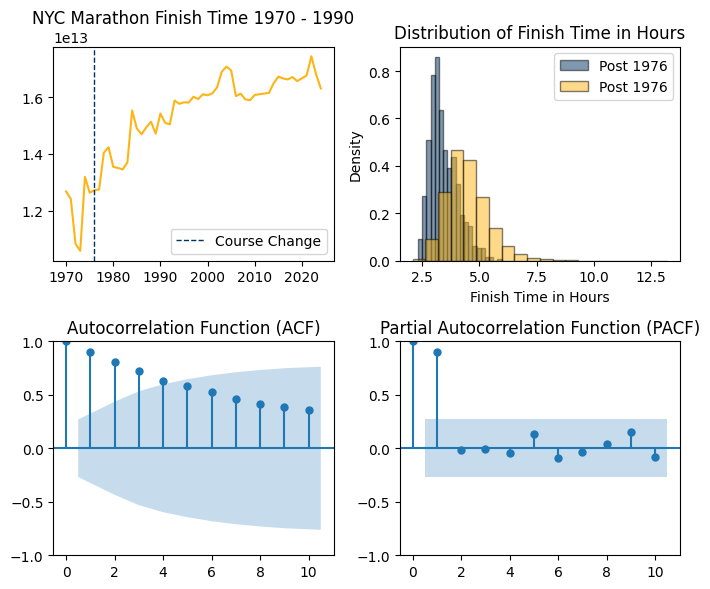

In [159]:
# plots to visualize the data
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.flatten()

axes[0].plot(df.groupby("Year")['Finish Time'].mean(), label = '', color=ucb_colors[1])
axes[0].axvline(x=1976, color=ucb_colors[0], linestyle='--', linewidth=1, label = 'Course Change')
axes[0].legend()
axes[0].set_title("NYC Marathon Finish Time 1970 - 1990")

df_pre_1976  = df[df['Year'] < 1976]
df_post_1976 = df[df['Year'] >= 1976]

axes[1].hist(df_pre_1976['Finish Time'].dt.total_seconds() / 3600,
         bins=20, density=True, color=ucb_colors[0],
         edgecolor='black', alpha=0.5, label='Post 1976')
axes[1].hist(df_post_1976['Finish Time'].dt.total_seconds() / 3600,
         bins=20, density=True, color=ucb_colors[1],
         edgecolor='black', alpha=0.5, label='Post 1976')
axes[1].legend()
axes[1].set_title("Distribution of Finish Time in Hours")
axes[1].set_xlabel("Finish Time in Hours")
axes[1].set_ylabel("Density")

df_ts = df.groupby("Year")['Finish Time'].mean()

# Plot ACF on the first subplot
plot_acf(df_ts, lags=10, ax=axes[2])
axes[2].set_title("Autocorrelation Function (ACF)")

# Plot PACF on the second subplot
plot_pacf(df_ts, lags=10, method='ywm', ax=axes[3])
axes[3].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()


> ACF/PACF diagnostics are consistent with an AR(1) specification. The Augmented Dickey-Fuller and Zivot-Andrews tests are applied to assess stationarity and identify potential structural breaks.

In [160]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("Reject H0: The series is stationary")
else:
    print("Fail to reject H0: The series is non-stationary")

ADF Statistic: -2.8739076888447093
p-value: 0.0484673992291602
Critical Values: {'1%': np.float64(-3.596635636000432), '5%': np.float64(-2.933297331821618), '10%': np.float64(-2.6049909750566895)}
Reject H0: The series is stationary


In [161]:
from statsmodels.tsa.stattools import zivot_andrews

# Run Zivot-Andrews test
# model options: 'c' = constant, 't' = trend, 'ct' = constant + trend
result = zivot_andrews(df_ts, maxlag=5, regression='ct', autolag='AIC')

# Print results
print("Test statistic:", result[0])
print("p-value:", result[1])
print("Critical values:", result[2])
print("Break point location (index):", result[3])

Test statistic: -5.641322917413705
p-value: 0.008217265653168111
Critical values: {'1%': np.float64(-5.57556), '5%': np.float64(-5.07332), '10%': np.float64(-4.82668)}
Break point location (index): 0



> Initial ZA test identifies break at index 0, likely due to the 15% trimming constraint excluding the 1976 break point. Restricted sample analysis (1970-1990) addresses this limitation.



**Refined Analysis with Restricted Sample**

To address this limitation, I re-estimated the model using a restricted sample from 1970 to 1990, repositioning the 1976 break point outside the excluded trimming region. With this 20-year window, the ZA test again rejected the null hypothesis, now identifying a break at index 1. This result provides statistical evidence of a structural break in the finish time series, consistent with the documented 1976 course modification. The analysis demonstrates that classical structural break tests can successfully detect regime changes in athletic performance data attributable to course design alterations.

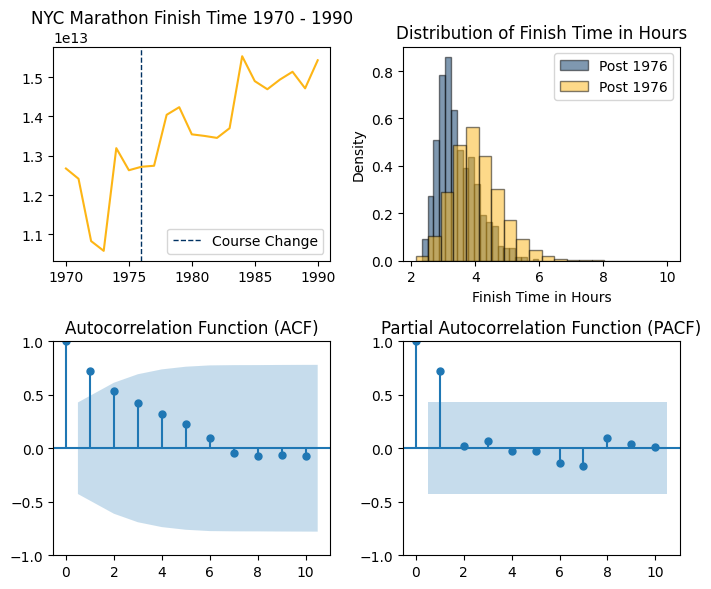

In [162]:
df_small = df[df['Year'] <= 1990]

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.flatten()

axes[0].plot(df_small.groupby("Year")['Finish Time'].mean(), label = '', color=ucb_colors[1])
axes[0].axvline(x=1976, color=ucb_colors[0], linestyle='--', linewidth=1, label = 'Course Change')
axes[0].legend()
axes[0].set_title("NYC Marathon Finish Time 1970 - 1990")

df_pre_1976  = df_small[df_small['Year'] < 1976]
df_post_1976 = df_small[df_small['Year'] >= 1976]

axes[1].hist(df_pre_1976['Finish Time'].dt.total_seconds() / 3600,
         bins=20, density=True, color=ucb_colors[0],
         edgecolor='black', alpha=0.5, label='Post 1976')
axes[1].hist(df_post_1976['Finish Time'].dt.total_seconds() / 3600,
         bins=20, density=True, color=ucb_colors[1],
         edgecolor='black', alpha=0.5, label='Post 1976')
axes[1].legend()
axes[1].set_title("Distribution of Finish Time in Hours")
axes[1].set_xlabel("Finish Time in Hours")
axes[1].set_ylabel("Density")

df_small_ts = df_small.groupby("Year")['Finish Time'].mean()

# Plot ACF on the first subplot
plot_acf(df_small_ts, lags=10, ax=axes[2])
axes[2].set_title("Autocorrelation Function (ACF)")

# Plot PACF on the second subplot
plot_pacf(df_small_ts, lags=10, method='ywm', ax=axes[3])
axes[3].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()


In [163]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_small_ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("Reject H0: The series is stationary")
else:
    print("Fail to reject H0: The series is non-stationary")

ADF Statistic: -1.2835092822262901
p-value: 0.6366826638803285
Critical Values: {'1%': np.float64(-3.8092091249999998), '5%': np.float64(-3.0216450000000004), '10%': np.float64(-2.6507125)}
Fail to reject H0: The series is non-stationary


In [164]:
from statsmodels.tsa.stattools import zivot_andrews

# Run Zivot-Andrews test
# model options: 'c' = constant, 't' = trend, 'ct' = constant + trend
result = zivot_andrews(df_small_ts, maxlag=5, regression='ct', autolag='AIC')

# Print results
print("Test statistic:", result[0])
print("p-value:", result[1])
print("Critical values:", result[2])
print("Break point location (index):", result[3])

Test statistic: -6.047565971948262
p-value: 0.002214071357478896
Critical values: {'1%': np.float64(-5.57556), '5%': np.float64(-5.07332), '10%': np.float64(-4.82668)}
Break point location (index): 1


>ZA test results indicate a structural break at index 1, corresponding to the 1976 course modification.




## Practical Case Study

Historical NYC Half Marathon data proved inaccessible without substantial web scraping efforts beyond this project's scope. The NYC Marathon analysis serves as a proof of concept, demonstrating that the Zivot-Andrews test can successfully detect structural breaks attributable to course modifications. This validation supports the methodological soundness of the proposed approach for future Half Marathon analysis.

## Conclusion

This study demonstrates the application of structural break detection methods to athletic performance data, specifically examining how course modifications affect marathon finish times. The Zivot-Andrews test successfully identified the 1976 NYC Marathon route change as a statistically significant structural break, validating the methodology's effectiveness for this domain. The analysis revealed important practical considerations, particularly the ZA test's 15% endpoint trimming constraint, which necessitated careful sample selection to ensure the target break point fell within the testable range. While alternative methods such as the Bai-Perron, Chow, and CUSUM tests offer complementary strengths, the ZA framework proved sufficient for single-break detection in this context. Future research should extend this analysis to the NYC Half Marathon once comprehensive historical data becomes available, and explore comparative performance of multiple structural break tests on road race datasets.

## Disclaimer

Portions of this text have been edited for clarity and conciseness using generative AI. All code examples and conceptual work presented are entirely original.